In [1]:
import pandas as pd
import numpy as np
import shapely as shp
import os
import geopandas as gp
from fiona.crs import from_epsg
import shapely



from fiona.crs import from_epsg

import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# set working directory so we save data in PUIDATA
os.chdir(os.getenv('PUIDATA'))




In [3]:

os.system('curl -o "nycb2010_16d.zip" http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nycb2010_16d.zip')
os.system('unzip nycb2010_16d.zip')
os.system('rm nycb2010_16d.zip')

0

In [4]:

ct_shape = gp.read_file('nycb2010_16d/nycb2010.shp')



In [5]:
ct_shape.crs = from_epsg(2263)

In [6]:
# 1. 
ct_shape.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((962269.1260375977 173705.5001831055,..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,"POLYGON ((964642.2676391602 161835.2651977539,..."
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,"POLYGON ((963363.1168212891 167356.3336181641,..."
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((960069.9965820312 161953.6936035156,..."
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,"POLYGON ((963023.891784668 158246.7521972656, ..."


In [7]:
ct_latlon = ct_shape[ct_shape.BoroName == "Brooklyn"]
ct_latlon = ct_latlon.to_crs(epsg=4326)

In [8]:
#2. 
ct_latlon.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
5037,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,POLYGON ((-74.00659158337982 40.65561273365177...
5038,30003011000,3,Brooklyn,1000,000301,63365.958361,1006.913933,POLYGON ((-73.99514512602698 40.69877384567195...
5039,30005011000,3,Brooklyn,1000,000501,116303.194723,1431.900698,POLYGON ((-73.99270830309769 40.69809925981344...
5040,30011001000,3,Brooklyn,1000,001100,54802.306859,951.657541,POLYGON ((-73.98514306089652 40.69488514296981...
5041,30015001000,3,Brooklyn,1000,001500,79196.530872,1129.348482,POLYGON ((-73.98305147125492 40.69837793354038...


In [9]:
#3.
cusp = shapely.geometry.Point(-73.986403, 40.693217)

In [10]:
#4. - Loop over the Brookly polygons (nearly 10000) and assess find in which geometry the polygon is contained
ct_latlon[ct_latlon.geometry.contains(cusp)].geometry
#. geometry returns loocation

35383    POLYGON ((-73.98619262163143 40.693753518938, ...
Name: geometry, dtype: object

In [11]:
#5.
cusp.crs = from_epsg(4326)

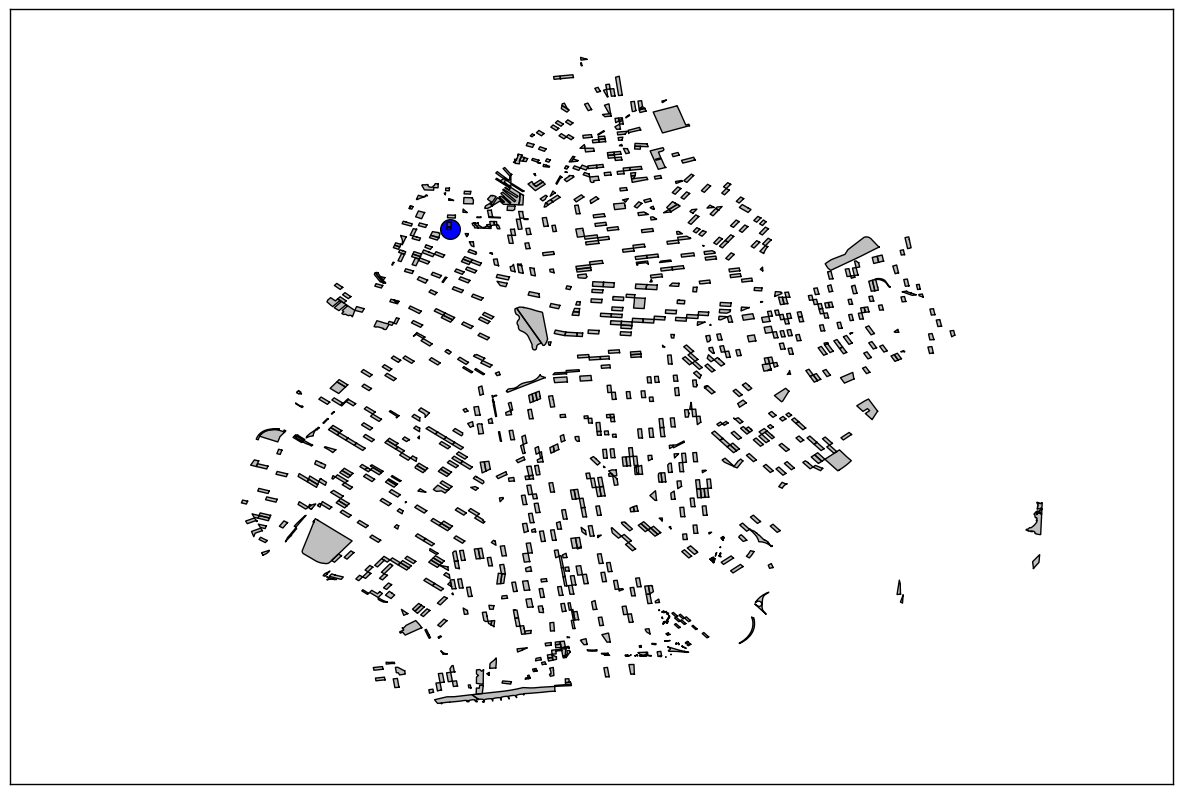

In [14]:

f, ax = plt.subplots(figsize=(15,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_latlon[::10].plot(ax=ax, color="grey")
ct_latlon[ct_latlon.geometry.contains(cusp)].plot(ax=ax, color="blue")
ax.scatter(-73.986403, 40.693217, s=200)